## NLP & MultiClass Classification: Coachella 2015 Twitter sentiment
https://www.crowdflower.com/data-for-everyone/

** Dataset Information: **

- 3847 tweets on Coachella 2015

** Attribute Information:**

- coachella_sentiment    
- coachella_yn          
- retweet_count        
- text              
- tweet_coord          
- tweet_created         
- tweet_id               
- tweet_location         
- user_timezon                  

** Objective of this project **

predict sentiment from tweets
 - positive, negative, and neutral for multi-class
 - positive or not for binary-class

# Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load Data
df = pd.read_csv('Coachella-2015-2-DFE.csv', encoding='latin')
pd.set_option('display.max_colwidth', -1)
df.head()

,coachella_sentiment,coachella_yn,name,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,positive,yes,kokombil,0,#Coachella2015 tickets selling out in less than 40 minutes _Ù_¦_Ù___Ù___Ù÷_ÙÎµ_ÙÎµ_Ù___Ù_¦ http://t.co/SmoXyteIMJ,"[0.0, 0.0]",1/7/15 15:02,5.529630e+17,NaN,Quito
1,positive,yes,MisssTaraaa10,2,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ´_ÙÓ´_ÙÓ´ #Coachella2015 http://t.co/Ov2eCJtAvR,NaN,1/7/15 15:02,5.529630e+17,united states,NaN
2,positive,yes,NMcCracken805,0,#Coachella2015 #VIP passes secured! See you there bitchesssss,NaN,1/7/15 15:01,5.529630e+17,"Costa Mesa, CA",NaN
3,positive,yes,wxpnfm,1,PhillyÛªs @warondrugsjams will play #Coachella2015 &amp; #GovBall2015! Watch them on Jimmy Fallon: http://t.co/wzaAE5wYNT http://t.co/sFL9I5sD20,NaN,1/7/15 15:01,5.529630e+17,"Philadelphia, PA and Worldwide",Quito
4,positive,yes,Caesears,0,If briana and her mom out to #Coachella2015 im out with them !!! _Ù÷Ý_Ù÷Ý_Ù÷Ý_ÙÕÄ,NaN,1/7/15 15:00,5.529630e+17,NaN,NaN


In [3]:
df['text'].tail()

3841    Excuse me while I go cry now. _Ù÷¢ #Coachella2015 http://t.co/K1nQD7BMAV                                   
3842    RT @touchofallright: Ride and Steely Dan. It would only be better if they were a supergroup. #Coachella2015
3843    I've been callin that since day one #Coachella2015                                                         
3844    Is this for real?!?! #Coachella2015 http://t.co/PbeDWs5OS9                                                 
3845    RT @Jen_Baz: C'monnnnnn lineup! #coachella2015 #Impatient                                                  
Name: text, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3846 entries, 0 to 3845
Data columns (total 10 columns):
coachella_sentiment    3846 non-null object
coachella_yn           3846 non-null object
name                   3846 non-null object
retweet_count          3846 non-null int64
text                   3846 non-null object
tweet_coord            242 non-null object
tweet_created          3846 non-null object
tweet_id               3846 non-null float64
tweet_location         2676 non-null object
user_timezone          2863 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 300.5+ KB


In [5]:
df.describe()

,retweet_count,tweet_id
count,3846.000000,3.846000e+03
mean,1.302912,5.526591e+17
std,11.873434,1.387891e+14
min,0.000000,5.522590e+17
25%,0.000000,5.525570e+17
50%,0.000000,5.525960e+17
75%,0.000000,5.527200e+17
max,485.000000,5.529630e+17


## Exploratory data analysis (EDA)

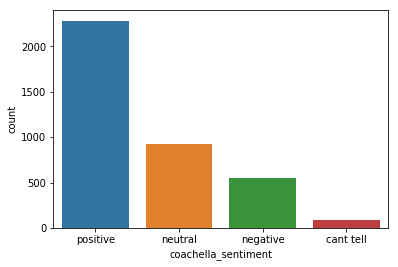

In [6]:
# inspect sentiment
sns.countplot(df['coachella_sentiment'])

In [7]:
# text length
df['text_length'] = df['text'].apply(len)
df[['coachella_sentiment','text_length','text']].head()

,coachella_sentiment,text_length,text
0,positive,114,#Coachella2015 tickets selling out in less than 40 minutes _Ù_¦_Ù___Ù___Ù÷_ÙÎµ_ÙÎµ_Ù___Ù_¦ http://t.co/SmoXyteIMJ
1,positive,93,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ´_ÙÓ´_ÙÓ´ #Coachella2015 http://t.co/Ov2eCJtAvR
2,positive,61,#Coachella2015 #VIP passes secured! See you there bitchesssss
3,positive,145,PhillyÛªs @warondrugsjams will play #Coachella2015 &amp; #GovBall2015! Watch them on Jimmy Fallon: http://t.co/wzaAE5wYNT http://t.co/sFL9I5sD20
4,positive,82,If briana and her mom out to #Coachella2015 im out with them !!! _Ù÷Ý_Ù÷Ý_Ù÷Ý_ÙÕÄ


In [8]:
df['text_length'].describe()

count    3846.000000
mean     88.046022  
std      34.016140  
min      19.000000  
25%      60.000000  
50%      85.000000  
75%      117.000000 
max      294.000000 
Name: text_length, dtype: float64

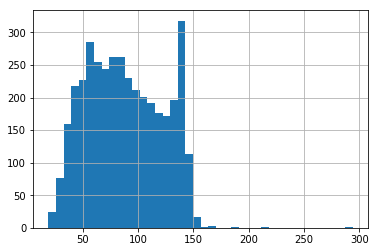

In [9]:
df['text_length'].hist(bins=40)

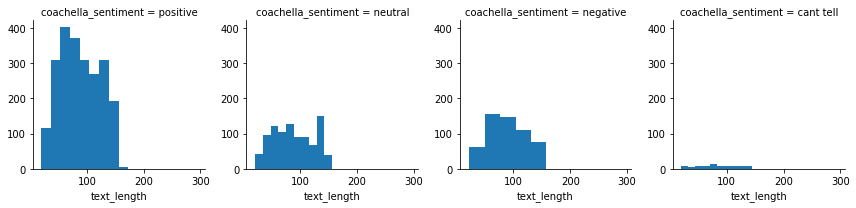

In [10]:
g = sns.FacetGrid(df,col='coachella_sentiment')
g.map(plt.hist,'text_length')

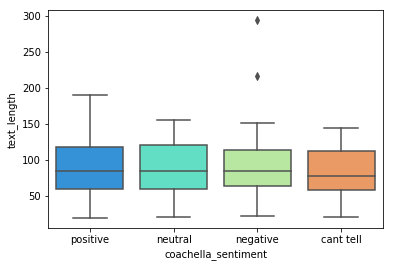

In [11]:
sns.boxplot(x='coachella_sentiment',y='text_length',data=df,palette='rainbow')

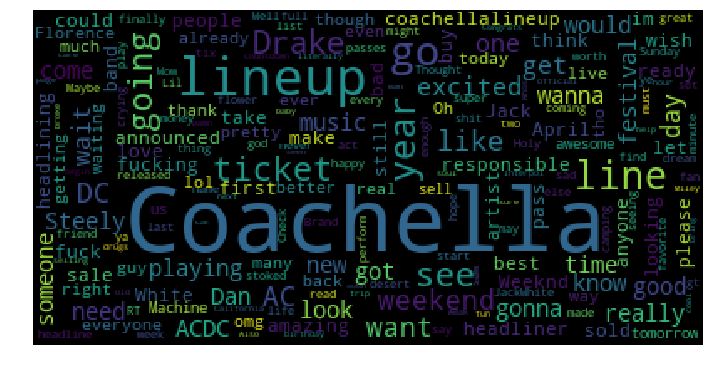

In [35]:
# word cloud
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re

def plot_word_cloud(): 
    text = df['text'].to_string() 
    text = re.sub(r'http\S+', '', text)
    text = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub('&amp', ' ', text)    
    text = re.sub('[^a-zA-Z]', ' ', text)

    wordcloud = WordCloud(
        relative_scaling=0.5,
        collocations=False,
        stopwords=set(stopwords.words('english'))).generate(text)

    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

plot_word_cloud()

##  Text Processing

** Clean text **

In [12]:
def clean_text(text):
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', text)
    text = re.sub(r'@\S+', ' ', text)
    text = re.sub('&amp', ' ', text)
    return text

df['clean_text'] = df['text'].apply(clean_text)

** Create BoW model **

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

def get_train_test(X, y, test_size):
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size,stratify=y,random_state=seed)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
          
    #word vectorizer
    word_vect = TfidfVectorizer(
        strip_accents='unicode',
        stop_words='english',
        analyzer='word',
        ngram_range=(1,1),
        sublinear_tf=True)
    X_train_word = word_vect.fit_transform(X_train)
    X_test_word = word_vect.transform(X_test)
    print(X_train_word.shape, X_test_word.shape)

    # Character vectorizer
    char_vect = TfidfVectorizer(
        strip_accents='unicode',
        stop_words='english',
        analyzer='char',
        ngram_range=(2,6),
        sublinear_tf=True,
        max_features=50000)
    X_train_char = char_vect.fit_transform(X_train)
    X_test_char = char_vect.transform(X_test)
    print(X_train_char.shape, X_test_char.shape)
        
    #word + char  
    X_train = hstack([X_train_char, X_train_word])
    X_test = hstack([X_test_char, X_test_word])
    print(X_train.shape, X_test.shape)          
    
    return X_train, X_test, y_train, y_test

## 1. Binary Classification

In [14]:
# create new class 'negative' column --> binary class
dict_class = {'positive':1, 'neutral':0,  'negative':0, 'cant tell':0}
df['positive'] = df['coachella_sentiment'].map(dict_class)
df['positive'].value_counts()

1    2283
0    1563
Name: positive, dtype: int64

#### Test Train sets

In [15]:
seed = 101
np.random.seed(seed)

X = df['clean_text']
y = df['positive'].values
test_size = 0.2

X_train, X_test, y_train, y_test = get_train_test(X, y, test_size)

(3076,) (770,) (3076,) (770,)
(3076, 3886) (770, 3886)
(3076, 50000) (770, 50000)
(3076, 53886) (770, 53886)


#### Model Train

Accuracy: 99.8%
roc_auc: 0.998


             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1250
          1       1.00      1.00      1.00      1826

avg / total       1.00      1.00      1.00      3076



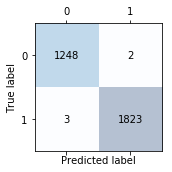

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,accuracy_score
# train model
model = RandomForestClassifier(n_estimators=50, random_state=seed)
model.fit(X_train,y_train)

#accuracy score
y_pred_train = model.predict(X_train)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_train,y_pred_train)*100))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_train,y_pred_train)))

#classification report
print('\n')
print(classification_report(y_train, y_pred_train))

#confusion matrix
confmat = confusion_matrix(y_train, y_pred_train)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

#### Model Evaluation with Test set

Accuracy: 71.7%
roc_auc: 0.686


             precision    recall  f1-score   support

          0       0.70      0.52      0.60       313
          1       0.72      0.85      0.78       457

avg / total       0.71      0.72      0.71       770



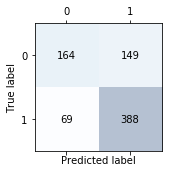

In [17]:
# predict class with test set (new, unseen)
y_pred_test = model.predict(X_test)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_test,y_pred_test)*100))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test,y_pred_test)))

#classification report
print('\n')
print(classification_report(y_test, y_pred_test))

#confusion matrix
confmat = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## 2. Multi-class Classification

#### Test Train sets

In [18]:
seed = 101
np.random.seed(seed)

X = df['clean_text']
y = df['coachella_sentiment'].values
test_size = 0.2

X_train, X_test, y_train, y_test = get_train_test(X, y, test_size)

(3076,) (770,) (3076,) (770,)
(3076, 3924) (770, 3924)
(3076, 50000) (770, 50000)
(3076, 53924) (770, 53924)


#### Model Train

Accuracy: 99.6%


             precision    recall  f1-score   support

  cant tell       0.97      0.97      0.97        66
   negative       1.00      0.99      1.00       442
    neutral       0.99      0.99      0.99       742
   positive       1.00      1.00      1.00      1826

avg / total       1.00      1.00      1.00      3076



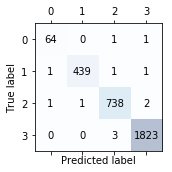

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# train model
model = RandomForestClassifier(n_estimators=50, random_state=seed)
model.fit(X_train,y_train)

#accuracy score
y_pred_train = model.predict(X_train)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_train,y_pred_train)*100))

#classification report
print('\n')
print(classification_report(y_train, y_pred_train))

#confusion matrix
confmat = confusion_matrix(y_train, y_pred_train)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

#### Model Evaluation with Test set

Accuracy: 66.4%


             precision    recall  f1-score   support

  cant tell       0.00      0.00      0.00        16
   negative       0.70      0.17      0.28       111
    neutral       0.62      0.37      0.46       186
   positive       0.67      0.93      0.78       457

avg / total       0.65      0.66      0.61       770



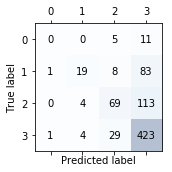

In [20]:
# predict class with test set (new, unseen)
y_pred_test = model.predict(X_test)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_test,y_pred_test)*100))

#classification report
print('\n')
print(classification_report(y_test, y_pred_test))

#confusion matrix
confmat = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()